# Homework 3
Consider a square wave force signal $f (t)$ with period 0.1 seconds. f = 1 at [0,0.025] and [0.075,1], f= -1 at [0.025,0.075].
Calculate the coefficients of the Fourier series expressed in exponential form, up to the 7th harmonic,
of this function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy 
from sympy import simplify, Symbol, integrate

T = 0.1 # Period of the signal
f = 1 / T # Frequency of the signal
w_n = 2 * np.pi * f # Angular frequency
t = Symbol('t', real=True)
n = Symbol('n', integer=True)

Fourier series coefficient C_n (n=1 to 7)
C_1: 4/pi
C_2: 0
C_3: -4/(3*pi)
C_4: 0
C_5: 4/(5*pi)
C_6: 0
C_7: -4/(7*pi)


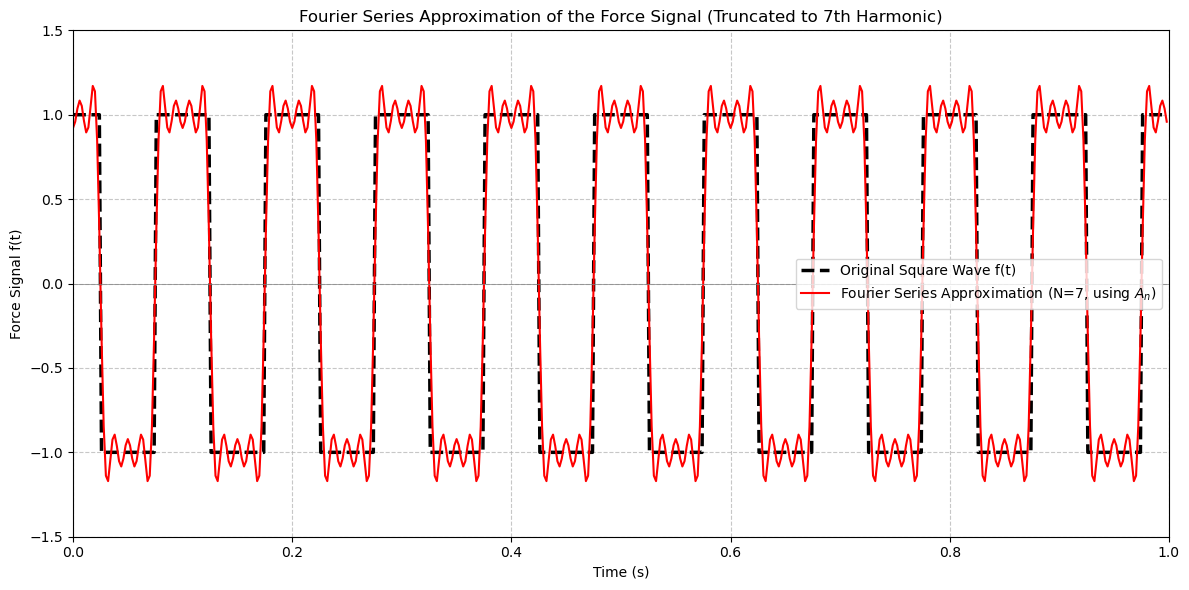

In [7]:
# 绘制时间范围
t_start = 0
t_end = 1.0  # 1秒
num_points = 500

t = np.linspace(t_start, t_end, num_points, endpoint=False)

# 原始方波信号 f(t)
def original_square_wave(t_val, T):
    t_mod = np.mod(t_val, T)
    if (0 <= t_mod < 0.025) or (0.075 <= t_mod < 0.1):
        return 1.0
    elif (0.025 <= t_mod < 0.075):
        return -1.0
    else:
        return 0.0

f_original = np.array([original_square_wave(ti, T) for ti in t])

from sympy import symbols, pi, N

# 定义符号 n
n = symbols('n', integer=True, positive=True)

# Calculate the coefficient
def calculate_An(n_val):
    if n_val % 2 == 0:
        # 偶数谐波系数为 0
        return 0
    
    # 奇数谐波
    if n_val % 4 == 1:
        # n = 1, 5, 9, ... (4k - 3)
        return 4 / (pi * n_val)
    elif n_val % 4 == 3:
        # n = 3, 7, 11, ... (4k - 1)
        return -4 / (pi * n_val)
    
    return 0 # 理论上不会发生

print("Fourier series coefficient C_n (n=1 to 7)")

for i in range(1, 8):
    A_i = calculate_An(i)
    
    print(f"C_{i}: {A_i}")

    # 打印近似数值 (可选)
    # if A_i != 0:
    #     print(f"   (Approx: {N(A_i):.6f})")



# 傅里叶级数近似 f_7(t) - 使用您提供的 A_n 系数 (三角形式)v 
def fourier_series_approx_An(t_val, max_harmonic):
    f_approx = np.zeros_like(t_val, dtype=float)
    
    # 只需要计算奇数项 n = 1, 3, 5, 7
    for n in range(1, max_harmonic + 1, 2):
        # Odd
        if n % 4 == 1:  # n = 1, 5 (4k - 3)
            C_n = 4.0 / (np.pi * n)
        elif n % 4 == 3: # n = 3, 7 (4k - 1)
            C_n = -4.0 / (np.pi * n)
        else: # Even
            C_n = 0.0
            
        f_approx += C_n * np.cos(n * omega0 * t_val)
        
    return f_approx

f_approx_7 = fourier_series_approx_An(t, 7)

plt.figure(figsize=(12, 6))

# Original signal
plt.plot(t, f_original, label='Original Square Wave f(t)', color='black', linewidth=2.5, linestyle='--')

# Fouier
plt.plot(t, f_approx_7, label='Fourier Series Approximation (N=7, using $A_n$)', color='red', linewidth=1.5)

plt.title('Fourier Series Approximation of the Force Signal (Truncated to 7th Harmonic)')
plt.xlabel('Time (s)')
plt.ylabel('Force Signal f(t)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.ylim(-1.5, 1.5)
plt.xlim(t_start, t_end)
plt.axhline(0, color='gray', linewidth=0.5)
plt.tight_layout()
plt.show()
